In [25]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

# dataset link

**Link**-->https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images

In [27]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [28]:
# pip install tensorflow

In [29]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
dataset_path = "Data"

In [31]:
# path  = r"dataset\test\bad\apple_bad\1.jpg"

In [32]:
# import cv2
# import numpy as np
# import warnings
# img = cv2.imread(path)
# print(img)

In [33]:
# # re-size all the images to this
# IMAGE_SIZE = [224, 224]

# train_path = 'train/'
# valid_path = 'val'



In [34]:
# img = cv2.imread(train_path)
# print(img)
# print()

In [35]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path =dataset_path +'/train'
valid_path = dataset_path +'/val'
test_path = dataset_path + '/test'

In [36]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [37]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [38]:
  # useful for getting number of output classes
folders = glob(train_path +'/*')

In [39]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [40]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [41]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [42]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [43]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)


test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [44]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [45]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [46]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [47]:
# fit the model
# Run the cell. It will take some time to execute
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import scipy


r = model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

C:\Users\deepp\AppData\Local\Temp\ipykernel_20936\2583480383.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 66s 3s/step - loss: 9.2773 - accuracy: 0.3850 - val_loss: 3.3987 - val_accuracy: 0.4952
Epoch 2/10
20/20 [==============================] - 49s 2s/step - loss: 2.4250 - accuracy: 0.6558 - val_loss: 2.7949 - val_accuracy: 0.5397
Epoch 3/10
20/20 [==============================] - 48s 2s/step - loss: 0.9110 - accuracy: 0.7961 - val_loss: 1.8960 - val_accuracy: 0.6222
Epoch 4/10
20/20 [==============================] - 60s 3s/step - loss: 0.5499 - accuracy: 0.8499 - val_loss: 1.5841 - val_accuracy: 0.6444
Epoch 5/10
20/20 [==============================] - 60s 3s/step - loss: 0.5447 - accuracy: 0.8483 - val_loss: 2.1052 - val_accuracy: 0.6571
Epoch 6/10
20/20 [==============================] - 64s 3s/step - loss: 0.7696 - accuracy: 0.8189 - val_loss: 2.5446 - val_accuracy: 0.5905
Epoch 7/10
20/20 [==============================] - 62s 3s/step - loss: 0.6939 - accuracy: 0.8418 - val_loss: 1.9040 - val_accuracy: 0.6730
Epoch 8/10
20/20 [==

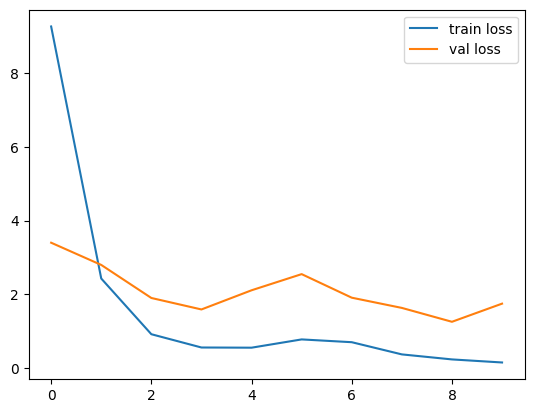

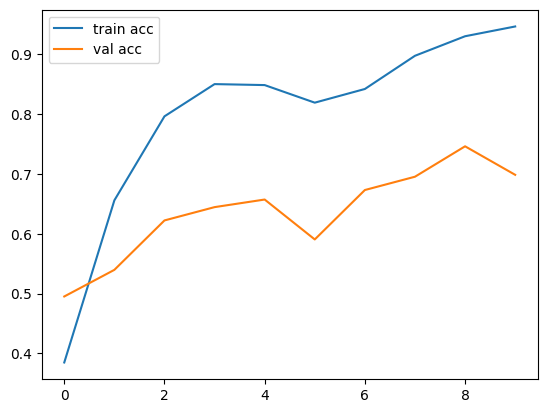

<Figure size 640x480 with 0 Axes>

In [48]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [49]:

# Print the final training and validation accuracy
final_train_accuracy = r.history['accuracy'][-1]
final_val_accuracy = r.history['val_accuracy'][-1]

print("Final Training Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Training Accuracy: 0.9461663961410522
Final Validation Accuracy: 0.6984127163887024


In [50]:
# save it as a h5 file in inversion v3 model


from tensorflow.keras.models import load_model

model.save('model_chest.h5')

d:\Codebook\fruit_quality_prediction\fruit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
#load the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [52]:
model=load_model('model_chest.h5')

# img=image.load_img("/content/drive/MyDrive/notebook/dataset/test/Potato___Early_blight/fa8656fd-03b1-467c-a877-99ce5632d580___RS_Early.B 7630.JPG")


In [53]:
ref = dict(zip(list(train_set.class_indices.values()),list(train_set.class_indices.keys())))

In [54]:
# def prediction(path):
#   img = image.load_img(path, target_size=(224, 224))
#   i = image.img_to_array(img)
#   i = np.expand_dims(i, axis=0)
#   img = preprocess_input(i)
#   pred = np.argmax(model.predict(img), axis=1)
#   print(f"the image belongs to {ref[pred]}")

In [55]:
# path = r"dataset\test\bad\banana_bad\3.jpg"
# prediction(path)

In [56]:
train_set.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [148]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)
  print(f"the image belongs to {ref[pred[0]]}")

path = r"Data\test\large.cell.carcinoma\000118 (2).png"
prediction(path)

# chest\Data\test\adenocarcinoma\000108 (8).png
# chest\Data\test\adenocarcinoma\000114 (10).png
# chest\Data\test\adenocarcinoma\000115 (9).png
# chest\Data\test\adenocarcinoma\000117 (6).png





1/1 [==============================] - 0s 93ms/step
the image belongs to large.cell.carcinoma


# prediction as input image

In [ ]:
#load the model
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [ ]:
# load the model
model=load_model(r"model_alzheimer.h5")


In [ ]:
def prediction(path):
  img = image.load_img(path, target_size=(224, 224))
  i = image.img_to_array(img)
  i = np.expand_dims(i, axis=0)
  img = preprocess_input(i)
  pred = np.argmax(model.predict(img), axis=1)
  print(f"the image belongs to {[pred[0]]}")

path = r"dataset\test\ModerateDemented\10.jpg"
prediction(path)

# {'MildDemented': 0,
#  'ModerateDemented': 1,
#  'NonDemented': 2,
#  'VeryMildDemented': 3}



1/1 [==============================] - 2s 2s/step
the image belongs to [1]


In [ ]:
# prediction with display images

1/1 [==============================] - 1s 1s/step


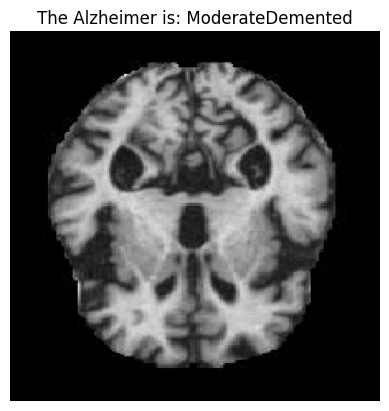

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
model=load_model(r"model_alzheimer.h5")

def predict_and_display(image_path, model, class_labels):
    
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"The Alzheimer is: {predicted_class_label}")
    plt.show()

# Load your trained model
# model.load_weights('model_maleria.h5')

# Define your class labels (e.g., ['car', 'truck', ...])
class_labels = ['MildDemented', 'ModerateDemented',  'NonDemented', 'VeryMildDemented']

# Replace 'path_to_test_image' with the path to the image you want to test
path = r"dataset\test\ModerateDemented\10.jpg"
predict_and_display(path, model, class_labels)